<a href="https://colab.research.google.com/github/taceroc/DSPS_TAcero/blob/main/hw2/Copy_of_MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

In [1]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl

import matplotlib.pyplot as plt

%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution) with 3 degrees of freedom, and with a scale parameter corresponding to the temperature in some way. 


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

Text(0, 0.5, 'Number of particles')

/Users/home/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


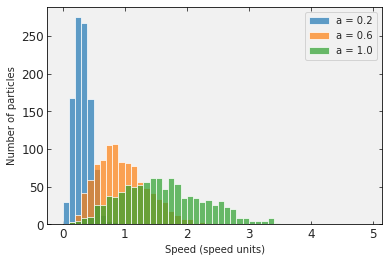

In [2]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);

pl.legend();

# your code to add labels here
plt.xlabel("Speed (speed units)")
plt.ylabel("Number of particles")

<h1 style="color:red"> &#10004; </h1>


# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**? 

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)
 

Your answer here: less speed --> less temperature. The depency is direct, then **$a \propto \sqrt{T}$**.

<h1 style="color:red"> &#10004; </h1>



# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed? 
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()```  calculate the gamma $\Gamma$ function,

**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**

In [4]:
# your code here
# -- mean of the chi distribution
# -- 3 degrees of freedom k = 3
mean_chia1 = 0.1*np.sqrt(2) * sp.special.gamma((3+1)/2) / sp.special.gamma((3)/2)
mean_chia2 = 0.6*np.sqrt(2) * sp.special.gamma((3+1)/2) / sp.special.gamma((3)/2)
mean_chia3 = 1.0*np.sqrt(2) * sp.special.gamma((3+1)/2) / sp.special.gamma((3)/2)
print("For a = 0.1 the chi mean is: {} \nFor a = 0.6 the chi mean is: {} \nFor a = 1.0 the chi mean is: {}".format(mean_chia1,mean_chia2,mean_chia3))

For a = 0.1 the chi mean is: 0.15957691216057313 
For a = 0.6 the chi mean is: 0.9574614729634385 
For a = 1.0 the chi mean is: 1.595769121605731


In [5]:
# -- most probable molecular speed (mean of the data)
for i in [0.1, 0.6, 1.0]:
  means = sp.stats.chi.rvs(df=3, scale=i, size=1000).mean()
  print("For a = {} th mean is: {}".format(i,means))

For a = 0.1 th mean is: 0.15600740039382158
For a = 0.6 th mean is: 0.9458902107988248
For a = 1.0 th mean is: 1.5951458260550855


The mean of the chi distribution for the parameter a < 1 are smaller than the mean of the most probable molecular speed. The mean for a = 1.0 is greater for the mean of the distribution.

<span style="color:red">The distribution is longer tailed on the right so all three means are to the right of the peak, which is the most probable speed </span>

This really only holds for perfect gasses, which means under 4 assumptions: 
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [ ]:
# your code here